In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut
from plottable.formatters import decimal_to_percent
import datetime


In [2]:
df=pd.read_html("https://www.espncricinfo.com/series/wpl-2024-25-1463356/points-table-standings",attrs={'class':'ds-w-full ds-table ds-table-md ds-table-auto  ds-w-full'})[0]
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Delhi Capitals Women,7,5,2,0,0,10,0.482,WLWWW,vs GG-W,1023/125.0,1050/136.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W...","WMarch 01, 2025, 14th Match, DC Women vs RCB W..."
2,2Mumbai Indians Women,5,3,2,0,0,6,0.166,LWWWL,"vs UPW-W, GG-W, RCB-W",722/93.0,718/94.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC...","LFebruary 28, 2025, 13th Match, MI Women vs DC..."
4,3UP Warriorz Women,5,2,3,0,0,4,-0.124,LLWTL,"vs GG-W, MI-W, RCB-W",808/100.0,778/94.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M...","LFebruary 26, 2025, 11th Match, UPW Women vs M..."
6,4Royal Challengers Bengaluru Women,6,2,4,0,0,4,-0.244,WLTLL,"vs UPW-W, MI-W",967/114.5,969/111.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"LMarch 01, 2025, 14th Match, RCB Women vs DC W...","LMarch 01, 2025, 14th Match, RCB Women vs DC W...","LMarch 01, 2025, 14th Match, RCB Women vs DC W...","LMarch 01, 2025, 14th Match, RCB Women vs DC W...","LMarch 01, 2025, 14th Match,

In [3]:
df=df.drop([1,3,5,7,9],axis=0)
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Delhi Capitals Women,7,5,2,0,0,10,0.482,WLWWW,vs GG-W,1023/125.0,1050/136.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2Mumbai Indians Women,5,3,2,0,0,6,0.166,LWWWL,"vs UPW-W, GG-W, RCB-W",722/93.0,718/94.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3UP Warriorz Women,5,2,3,0,0,4,-0.124,LLWTL,"vs GG-W, MI-W, RCB-W",808/100.0,778/94.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4Royal Challengers Bengaluru Women,6,2,4,0,0,4,-0.244,WLTLL,"vs UPW-W, MI-W",967/114.5,969/111.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5Gujarat Giants Women,5,2,3,0,0,4,-0.450,LWLLW,"vs UPW-W, DC-W, MI-W",718/94.3,723/89.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.reset_index(inplace=True)

In [5]:
ls=list(df['Teams'])
lst=[]
for x in ls:
    y=x[1:]
    lst.append(y)
lst
df.loc[:,'Teams']=lst

In [6]:
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Delhi Capitals Women,7,5,2,0,0,10,0.482,WLWWW,...,1023/125.0,1050/136.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mumbai Indians Women,5,3,2,0,0,6,0.166,LWWWL,...,722/93.0,718/94.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,UP Warriorz Women,5,2,3,0,0,4,-0.124,LLWTL,...,808/100.0,778/94.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,Royal Challengers Bengaluru Women,6,2,4,0,0,4,-0.244,WLTLL,...,967/114.5,969/111.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Gujarat Giants Women,5,2,3,0,0,4,-0.450,LWLLW,...,718/94.3,723/89.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['Teams'].unique()

array(['Delhi Capitals Women', 'Mumbai Indians Women',
       'UP Warriorz Women', 'Royal Challengers Bengaluru Women',
       'Gujarat Giants Women'], dtype=object)

In [8]:
int_to=['M', 'W', 'L', 'T', 'N/R', 'PT']
float_to=['NRR']
for x in int_to:
    df[x]=df[x].astype('int')
for y in float_to:
    df[y]=df[y].astype("float")
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Delhi Capitals Women,7,5,2,0,0,10,0.482,WLWWW,...,1023/125.0,1050/136.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mumbai Indians Women,5,3,2,0,0,6,0.166,LWWWL,...,722/93.0,718/94.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,UP Warriorz Women,5,2,3,0,0,4,-0.124,LLWTL,...,808/100.0,778/94.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,Royal Challengers Bengaluru Women,6,2,4,0,0,4,-0.244,WLTLL,...,967/114.5,969/111.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Gujarat Giants Women,5,2,3,0,0,4,-0.450,LWLLW,...,718/94.3,723/89.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['Rk']=np.arange(1,6)

In [10]:
df['Teams']=[x.split(' Women')[0] for x in df['Teams']]

In [11]:
df['Badge']=df['Teams'].apply(
    lambda x: f"C://Users//user//Desktop//Github//Projects//Cricket//{x}.png"
)

In [12]:
df=df[['Rk','Badge','Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR']]

In [13]:
df

,Rk,Badge,Teams,M,W,L,T,N/R,PT,NRR
0,1,C://Users//user//Desktop//Github//Projects//Cr...,Delhi Capitals,7,5,2,0,0,10,0.482
1,2,C://Users//user//Desktop//Github//Projects//Cr...,Mumbai Indians,5,3,2,0,0,6,0.166
2,3,C://Users//user//Desktop//Github//Projects//Cr...,UP Warriorz,5,2,3,0,0,4,-0.124
3,4,C://Users//user//Desktop//Github//Projects//Cr...,Royal Challengers Bengaluru,6,2,4,0,0,4,-0.244
4,5,C://Users//user//Desktop//Github//Projects//Cr...,Gujarat Giants,5,2,3,0,0,4,-0.450


In [14]:
bg_color="#ffffff"
text_color="#000000"

plt.rcParams["text.color"]=text_color
plt.rcParams['font.family']='Bebas Neue'
plt.rcParams['font.size']=40

In [15]:
col_defs=[
    ColumnDefinition(
        name="Rk",
        textprops={'ha':'center'},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="Badge",
        textprops={'ha':'center','va':'center','color':bg_color},
        width=0.75,
        plot_fn=image,
        title="",
    ),
    ColumnDefinition(
        name="Teams",
        textprops={'ha':'left','fontweight':'bold','fontsize':27},
        width=1.75,
        title="Teams",
    ),
    ColumnDefinition(
        name="M",
        textprops={'ha':'center'},
        width=0.5,
        title="M",
    ),
    ColumnDefinition(
        name="W",
        textprops={'ha':'center'},
        width=0.5,
        title="W",
    ),
        ColumnDefinition(
        name="L",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="T",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="N/R",
        textprops={"ha": "center"},
        width=0.5, 
    ),
    ColumnDefinition(
        name="PT",
        textprops={"ha": "center",'fontweight':'bold'},
        width=0.5,
        title='Pts'
    ),
    ColumnDefinition(
        name="NRR",
        textprops={"ha": "center"},
        width=0.5,
        border='right',
    ),
]

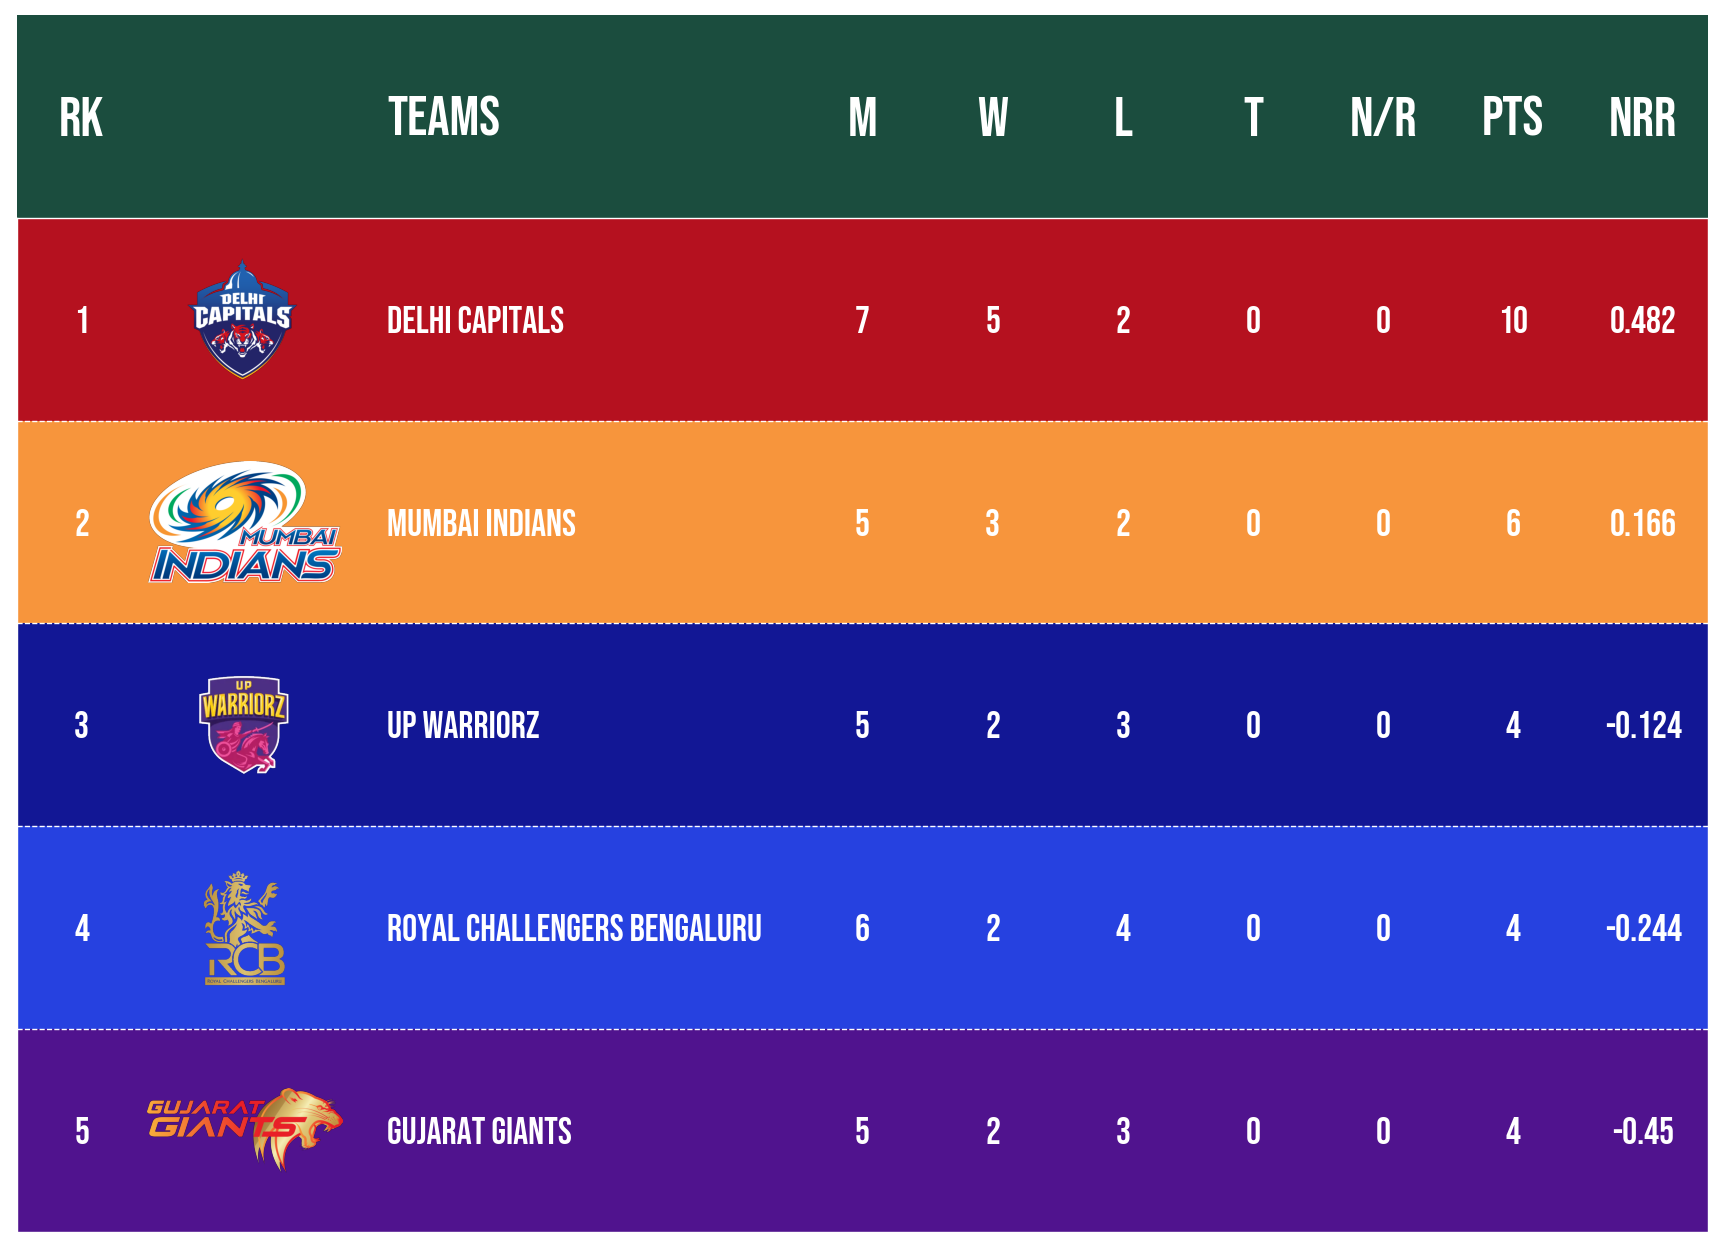

In [16]:
fig, ax = plt.subplots(figsize=(22, 16))
fig.set_facecolor('#ffffff')
ax.set_facecolor('#1B4D3E')

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": '--',"color":"#ffffff"},
    footer_divider=True,
    textprops={"fontsize": 27,"color":'#ffffff'},
    footer_divider_kw={"color": "#ffffff", "lw": 1},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-","color":"#ffffff"},
    column_border_kw={"linewidth": 1, "linestyle": "-","color":'#ffffff'},
    ax=ax,
)

#kkr
table.rows[0].set_facecolor("#B5111F")
table.rows[0].set_fontcolor("#ffffff")
#srh
table.rows[1].set_facecolor("#F7953C")
table.rows[1].set_fontcolor("#ffffff")
#rr
table.rows[2].set_facecolor("#121795")
table.rows[2].set_fontcolor("#ffffff")
#rcb
table.rows[3].set_facecolor("#2641E0")
table.rows[3].set_fontcolor("#ffffff")
#csk
table.rows[4].set_facecolor("#50138E")
table.rows[4].set_fontcolor("#ffffff")

cols=list(df.columns)
cols.remove('PT')
cols.append('Pts')

for label in table.ax.texts:
    # print(label)
    if label.get_text() in cols:  
        label.set_fontsize(40)  
        label.set_fontweight("bold")  
        # label.set_fontname("DaFont")  
        label.set_color("#ffffff")  
# ax.text(3.26,4.87,'@copyright',color="white",fontsize=25,alpha=0.5)
# ax.set_title("WPL 2025",pad=20,fontdict={
#     'fontsize':100
# })

plt.show()


In [17]:
date=datetime.datetime.now().strftime("%m_%d_%Y_%H:%M:%S")
fig.savefig(
    f"wpl_1.png",
    # facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight",
)